<a href="https://colab.research.google.com/github/MathurTarun06/Image_Classification/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install ipython-autotime
# %load_ext autotime  
get_ipython().system('pip install ipython-autotime') 
get_ipython().magic('load_ext autotime')             #command to get the loading time for one specific cell

time: 412 µs (started: 2021-07-30 15:50:59 +00:00)


In [7]:
'''Datasets: There are four ways to get images to train the model.
	1.Download Manually
	2.Download datasets from kaggle
	3.Build a Image web crawler using programming.
	4.Use python libraries to scrape the images(using bing downloader)'''

'Datasets: There are four ways to get images to train the model.\n\t1.Download Manually\n\t2.Download datasets from kaggle\n\t3.Build a Image web crawler using programming.\n\t4.Use python libraries to scrape the images(using bing downloader)'

time: 3.44 ms (started: 2021-07-30 11:26:31 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.03 s (started: 2021-07-30 15:51:31 +00:00)


In [3]:
!mkdir images   #mkdir is command to make directory

time: 112 ms (started: 2021-07-30 15:51:50 +00:00)


In [8]:
from bing_image_downloader import downloader
downloader.download("lavender",limit=30,output_dir='images',adult_filter_off=True)


[%] Downloading Images to /content/images/lavender


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://s3-ap-southeast-1.amazonaws.com/easystore.co/19962/images/products/821731.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://store.greenthumbsgalore.com/2175-large_default/lavender-true-grosso.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.seeds-gallery.shop/6518-large_default/true-lavender-seeds.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.theseedcollection.com.au/assets/full/B2-01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.store-assets.com/s/19962/i/821730.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://gardenseedsmarket.com/images/detailed/19/2_9a31021bbc12.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.theseedcollection.com.au/assets/alt_1/B2-01.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://al

In [7]:
!pip install scikit-image

time: 2.62 s (started: 2021-07-30 16:02:23 +00:00)


In [9]:
!pip install -U cython

     |████████████████████████████████| 2.0 MB 13.9 MB/s 
  Attempting uninstall: cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23
time: 5.46 s (started: 2021-07-30 16:04:38 +00:00)


In [25]:
 #Preprocessing
 #1.Resizing
 #2.Flattening
 
 import os
 import matplotlib.pyplot as plt
 import numpy as np
 from skimage.io import imread           #for reading images
 from skimage.transform import resize   # to make images of same pixel or dimension

 target = []      #output
 images = []      #input
 flat_data = []

 DATADIR = '/content/images'
 Categories = ['beautiful rose','sunflower','water lily' ]

#joining all the categories into 1
 for category in Categories:
   class_num = Categories.index(category)   #Label Encoding the values to make model understand categories easily
   path = os.path.join(DATADIR,category)     #created path to use all the images
   for image in os.listdir(path):    
     image_list = imread(os.path.join(path,image))

    #  print(image_list.shape)
  #  plt.imshow(image_list)
     image_resized = resize(image_list,(150,150,3))    #normalizes data from 0 to 1
     flat_data.append(image_resized.flatten())
     images.append(image_resized)
     target.append(class_num)

 flat_data = np.array(flat_data)
 target = np.array(target)
 images = np.array(images)


time: 31 s (started: 2021-07-30 17:10:56 +00:00)


In [26]:
len(flat_data[0])

67500

time: 3.25 ms (started: 2021-07-30 17:11:53 +00:00)


In [27]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 3.62 ms (started: 2021-07-30 17:11:56 +00:00)


<BarContainer object of 3 artists>

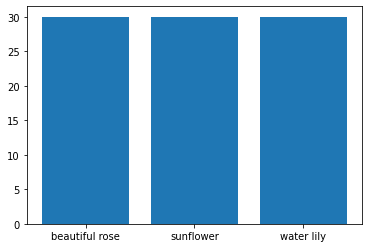

time: 124 ms (started: 2021-07-30 17:12:01 +00:00)


In [28]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [15]:
!pip install scikit-learn

time: 2.63 s (started: 2021-07-30 16:09:51 +00:00)


In [29]:
 #Splitting of data
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                  test_size = 0.3,random_state = 109) 

time: 11.7 ms (started: 2021-07-30 17:12:06 +00:00)


In [30]:
 from sklearn.model_selection import GridSearchCV   #Generates all the combinations of a hyperparameter grid
                                                    #to find parameters used in support vectors are proper. SVM need hyper parameters which seperates bw both the categories
 from sklearn import svm

 param_grid = [
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
 ]

 svc = svm.SVC(probability = True)
 clf = GridSearchCV(svc,param_grid)
 clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 18s (started: 2021-07-30 17:12:15 +00:00)


In [31]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 1, 1])

time: 135 ms (started: 2021-07-30 17:13:43 +00:00)


In [32]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 4.66 ms (started: 2021-07-30 17:13:48 +00:00)


In [20]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 83.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


time: 8.4 s (started: 2021-07-30 16:13:59 +00:00)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

time: 466 µs (started: 2021-07-30 17:14:06 +00:00)


In [34]:
accuracy_score(y_pred,y_test)

0.7037037037037037

time: 2.4 ms (started: 2021-07-30 17:14:11 +00:00)


In [57]:
confusion_matrix(y_pred,y_test)

array([[4, 1, 0],
       [1, 8, 1],
       [3, 2, 7]])

time: 11.6 ms (started: 2021-07-30 17:37:43 +00:00)


In [36]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('image_classification_model.p','wb')) #writing byte

time: 28.4 ms (started: 2021-07-30 17:14:39 +00:00)


In [37]:

model = pickle.load(open('image_classification_model.p','rb')) #reading byte

time: 13.5 ms (started: 2021-07-30 17:14:42 +00:00)


Enter your URLhttps://www.panamseed.com/dispthumb.aspx?imgsize=Display&imageid=191452
(600, 600, 3)
 Predicted Output: beautiful rose


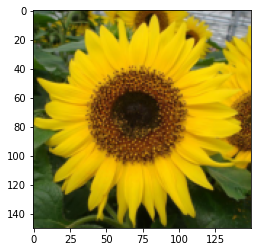

time: 9.8 s (started: 2021-07-30 17:36:21 +00:00)


In [55]:
# Testing a new image
flat_data = []
url = input('Enter your URL')
image = imread(url)
image_resized = resize(image,(150,150,3))
flat_data.append(image_resized.flatten())
flat_data = np.array(flat_data)
print(image.shape)
plt.imshow(image_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f' Predicted Output: {y_out}')
#https://upload.wikimedia.org/wikipedia/commons/c/c7/Roses_Boutons_FR_2012.jpg

In [58]:
!pip install streamlit

!pip install pyngrok



time: 5.57 s (started: 2021-07-30 17:38:46 +00:00)


In [74]:
from pyngrok import ngrok

time: 1.14 ms (started: 2021-07-30 18:34:15 +00:00)


In [82]:
%%writefile classifier_app.py
import streamlit as st
st.title('Image Classifier using Machine Learning') 

Overwriting classifier_app.py
time: 7.07 ms (started: 2021-07-30 20:06:39 +00:00)


In [ ]:
# !nohup streamlit run classifier_app.py           #The major Problem
# # !nohup streamlit run --server.port 80 classifier_app.py >/dev/null #nohup makes it run in background
# url = ngrok.connect(port='80')
# url



nohup: ignoring input and appending output to 'nohup.out'
